In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

EDA

In [2]:
df=pd.read_csv("credit_risk_dataset.csv")
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [4]:
df['loan_status'].value_counts()

loan_status
0    25473
1     7108
Name: count, dtype: int64

Clearly We are able to see that this is the case of imbalance dataset

In [5]:
df['person_home_ownership'].value_counts()

person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64

In [6]:
df['loan_intent'].value_counts()

loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64

In [7]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

<Axes: ylabel='count'>

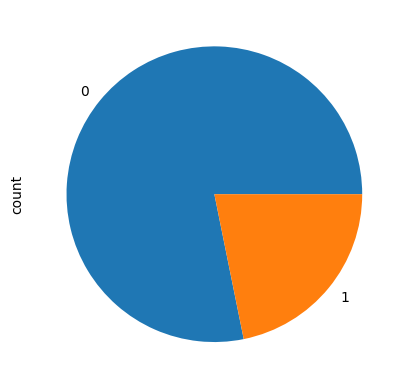

In [8]:
df["loan_status"].value_counts().plot.pie()

<Axes: >

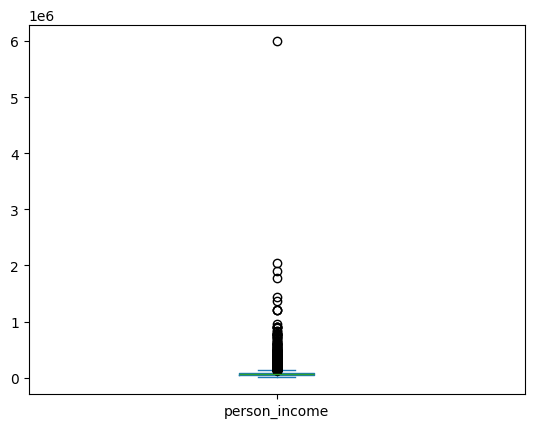

In [9]:
df['person_income'].plot.box()

C:\Users\adhir\AppData\Local\Temp\ipykernel_16860\2747349938.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="loan_status", data=df, palette="Set1", order=loan_status_values)


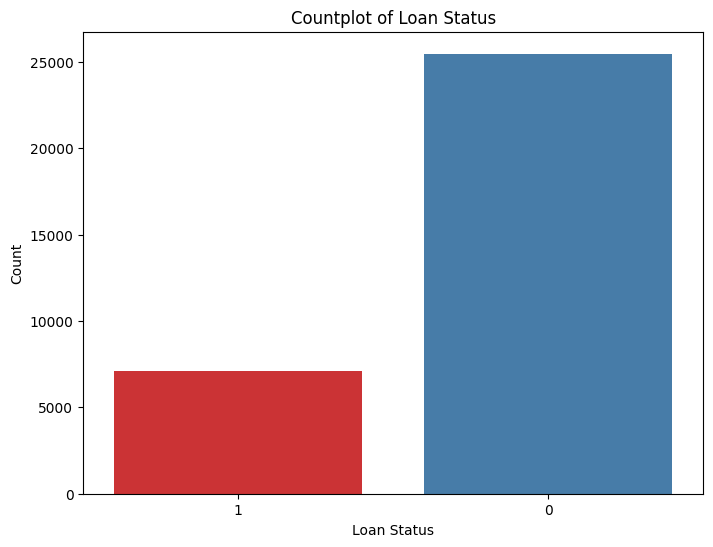

In [10]:
loan_status_values = df["loan_status"].unique()
plt.figure(figsize=(8, 6))
sns.countplot(x="loan_status", data=df, palette="Set1", order=loan_status_values)
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.title("Countplot of Loan Status")
plt.show()

In [11]:
df.fillna(df["loan_int_rate"].mean(),inplace=True)
df.fillna(df["person_emp_length"].mean(),inplace=True)

In [12]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [13]:
from sklearn.calibration import LabelEncoder

df_encoded = df.copy()

label_encoders = {}
columns_to_encode = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    df_encoded[column] = label_encoders[column].fit_transform(df_encoded[column])

df_encoded.head()


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,3,123.0,4,3,35000,16.02,1,0.59,1,3
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1.0,3,2,5500,12.87,1,0.57,0,3
3,23,65500,3,4.0,3,2,35000,15.23,1,0.53,0,2
4,24,54400,3,8.0,3,2,35000,14.27,1,0.55,1,4


In [14]:
corr = df_encoded.corr()['loan_status'].sort_values(ascending=False)
fig = px.bar(x = corr.keys(), y = corr.values, title = 'correlation with target value',
            labels = {'x':'Features', 'y': 'Correlation'})
fig.show()



In [15]:
df_encoded=df_encoded.drop(['cb_person_cred_hist_length','person_age'],axis=1)

In [16]:
df.isnull().values.any()

False

In [17]:
default = df_encoded[df_encoded['loan_status']==1]
nonDefault = df_encoded[df_encoded['loan_status']==0]
print(nonDefault.shape,default.shape)

(25473, 10) (7108, 10)


In [18]:
X = df_encoded.drop(['loan_status'], axis=1)
y = df_encoded['loan_status']
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_resample(X,y)
X_res.shape,y_res.shape

((48084, 9), (48084,))

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.25,random_state=42)

In [20]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 25473, 1: 7108})
Resampled dataset shape Counter({1: 24042, 0: 24042})


C:\Users\adhir\AppData\Local\Temp\ipykernel_16860\1442819468.py:1: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.



Text(0, 0.5, 'Frequency')

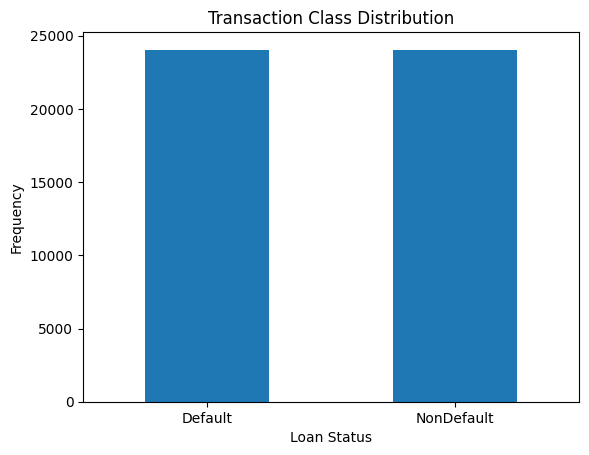

In [21]:
count_classes = pd.value_counts(y_res, sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), ["Default","NonDefault"])
plt.xlabel("Loan Status")
plt.ylabel("Frequency")

In [22]:
count_classes = pd.value_counts(y_res, sort = True)
count_classes

C:\Users\adhir\AppData\Local\Temp\ipykernel_16860\3675094188.py:1: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.



loan_status
1    24042
0    24042
Name: count, dtype: int64

In [23]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [24]:
X_train.shape

(36063, 9)

In [25]:
X_test.shape

(12021, 9)

In [26]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def create_model(units1=64, units2=32, dropout_rate=0.3, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(units=units1, activation='relu', input_shape=(9,))) 
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=units2, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=1, activation='sigmoid'))

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model
    
param_dist = {
    'units1': [32, 64, 128],
    'units2': [16, 32, 64],
    'dropout_rate': [0.2, 0.3, 0.4],
    'learning_rate': [0.001, 0.01, 0.1]
}

best_accuracy = 0
best_hyperparameters = None

for _ in range(10): 
    hyperparameters = {param: np.random.choice(values) for param, values in param_dist.items()}
    model = create_model(**hyperparameters)
    model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)  # Added batch_size and validation_split
    y_pred = (model.predict(X_test) > 0.5).astype('int32')
    accuracy = accuracy_score(y_test, y_pred)

    print(f'Hyperparameters: {hyperparameters}, Accuracy: {accuracy:.4f}')

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_hyperparameters = hyperparameters

print("Best Hyperparameters:", best_hyperparameters)
print("Best Accuracy:", best_accuracy)


Epoch 1/50


c:\Users\adhir\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



902/902 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6068 - loss: 0.6593 - val_accuracy: 0.4851 - val_loss: 0.7014
Epoch 2/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4984 - loss: 0.6959 - val_accuracy: 0.4851 - val_loss: 0.7094
Epoch 3/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4978 - loss: 0.6988 - val_accuracy: 0.4851 - val_loss: 0.7067
Epoch 4/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5068 - loss: 0.6955 - val_accuracy: 0.4851 - val_loss: 0.6932
Epoch 5/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4988 - loss: 0.6954 - val_accuracy: 0.5149 - val_loss: 0.6942
Epoch 6/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5112 - loss: 0.6947 - val_accuracy: 0.4851 - val_loss: 0.6956
Epoch 7/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5054 - loss: 0.6972 - val_accuracy: 0.4851 - val_loss: 0.6962
Epoch 8/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4924 - loss: 0.6955 - val_accuracy: 0.4851 - val_

c:\Users\adhir\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



902/902 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6150 - loss: 0.7330 - val_accuracy: 0.5149 - val_loss: 0.6929
Epoch 2/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5046 - loss: 0.7029 - val_accuracy: 0.4851 - val_loss: 0.6968
Epoch 3/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5010 - loss: 0.6955 - val_accuracy: 0.4851 - val_loss: 0.6956
Epoch 4/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4961 - loss: 0.6950 - val_accuracy: 0.4851 - val_loss: 0.6990
Epoch 5/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4976 - loss: 0.6956 - val_accuracy: 0.5149 - val_loss: 0.6932
Epoch 6/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4927 - loss: 0.6954 - val_accuracy: 0.5149 - val_loss: 0.6952
Epoch 7/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5015 - loss: 0.6959 - val_accuracy: 0.5149 - val_loss: 0.6927
Epoch 8/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5001 - loss: 0.6948 - val_accuracy: 0.5149 - val_

c:\Users\adhir\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



902/902 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7820 - loss: 0.4798 - val_accuracy: 0.8266 - val_loss: 0.3965
Epoch 2/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8060 - loss: 0.4350 - val_accuracy: 0.8342 - val_loss: 0.3844
Epoch 3/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8110 - loss: 0.4230 - val_accuracy: 0.8383 - val_loss: 0.3753
Epoch 4/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8118 - loss: 0.4188 - val_accuracy: 0.8340 - val_loss: 0.3754
Epoch 5/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8143 - loss: 0.4130 - val_accuracy: 0.8379 - val_loss: 0.3756
Epoch 6/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8131 - loss: 0.4096 - val_accuracy: 0.8408 - val_loss: 0.3725
Epoch 7/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8156 - loss: 0.4032 - val_accuracy: 0.8374 - val_loss: 0.3642
Epoch 8/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8261 - loss: 0.3965 - val_accuracy: 0.8417 - val_

c:\Users\adhir\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



902/902 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7732 - loss: 0.4777 - val_accuracy: 0.8263 - val_loss: 0.3883
Epoch 2/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8132 - loss: 0.4079 - val_accuracy: 0.8322 - val_loss: 0.3787
Epoch 3/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8217 - loss: 0.3937 - val_accuracy: 0.8389 - val_loss: 0.3715
Epoch 4/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8220 - loss: 0.3901 - val_accuracy: 0.8442 - val_loss: 0.3620
Epoch 5/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8290 - loss: 0.3794 - val_accuracy: 0.8431 - val_loss: 0.3601
Epoch 6/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8319 - loss: 0.3713 - val_accuracy: 0.8461 - val_loss: 0.3567
Epoch 7/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8352 - loss: 0.3677 - val_accuracy: 0.8519 - val_loss: 0.3481
Epoch 8/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8331 - loss: 0.3707 - val_accuracy: 0.8523 - val_

c:\Users\adhir\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



902/902 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7738 - loss: 0.4772 - val_accuracy: 0.8206 - val_loss: 0.4031
Epoch 2/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8110 - loss: 0.4193 - val_accuracy: 0.8288 - val_loss: 0.3930
Epoch 3/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8103 - loss: 0.4180 - val_accuracy: 0.8386 - val_loss: 0.3896
Epoch 4/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8196 - loss: 0.4008 - val_accuracy: 0.8353 - val_loss: 0.3774
Epoch 5/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8172 - loss: 0.4029 - val_accuracy: 0.8370 - val_loss: 0.3797
Epoch 6/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8214 - loss: 0.3975 - val_accuracy: 0.8396 - val_loss: 0.3732
Epoch 7/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8199 - loss: 0.3985 - val_accuracy: 0.8428 - val_loss: 0.3708
Epoch 8/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8188 - loss: 0.3988 - val_accuracy: 0.8447 - val_

c:\Users\adhir\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



902/902 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7006 - loss: 0.6087 - val_accuracy: 0.7335 - val_loss: 0.5367
Epoch 2/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7232 - loss: 0.5677 - val_accuracy: 0.7822 - val_loss: 0.4971
Epoch 3/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7370 - loss: 0.5609 - val_accuracy: 0.7552 - val_loss: 0.5198
Epoch 4/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7431 - loss: 0.5428 - val_accuracy: 0.7685 - val_loss: 0.5140
Epoch 5/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7316 - loss: 0.5557 - val_accuracy: 0.7563 - val_loss: 0.5384
Epoch 6/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7437 - loss: 0.5611 - val_accuracy: 0.7848 - val_loss: 0.5012
Epoch 7/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7513 - loss: 0.5403 - val_accuracy: 0.7737 - val_loss: 0.5718
Epoch 8/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7522 - loss: 0.5444 - val_accuracy: 0.7798 - val_

c:\Users\adhir\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



902/902 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6935 - loss: 0.5689 - val_accuracy: 0.8012 - val_loss: 0.4414
Epoch 2/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7870 - loss: 0.4725 - val_accuracy: 0.8105 - val_loss: 0.4258
Epoch 3/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7928 - loss: 0.4662 - val_accuracy: 0.8157 - val_loss: 0.4131
Epoch 4/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8040 - loss: 0.4395 - val_accuracy: 0.8220 - val_loss: 0.4066
Epoch 5/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8019 - loss: 0.4406 - val_accuracy: 0.8260 - val_loss: 0.3972
Epoch 6/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8097 - loss: 0.4265 - val_accuracy: 0.8224 - val_loss: 0.3964
Epoch 7/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8119 - loss: 0.4282 - val_accuracy: 0.8264 - val_loss: 0.3895
Epoch 8/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8094 - loss: 0.4273 - val_accuracy: 0.8288 - val_

c:\Users\adhir\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



902/902 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7049 - loss: 0.5620 - val_accuracy: 0.8085 - val_loss: 0.4250
Epoch 2/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7878 - loss: 0.4609 - val_accuracy: 0.8205 - val_loss: 0.4032
Epoch 3/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7997 - loss: 0.4462 - val_accuracy: 0.8253 - val_loss: 0.3939
Epoch 4/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8144 - loss: 0.4249 - val_accuracy: 0.8298 - val_loss: 0.3901
Epoch 5/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8130 - loss: 0.4268 - val_accuracy: 0.8316 - val_loss: 0.3835
Epoch 6/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8173 - loss: 0.4130 - val_accuracy: 0.8354 - val_loss: 0.3779
Epoch 7/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8202 - loss: 0.4126 - val_accuracy: 0.8371 - val_loss: 0.3741
Epoch 8/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8232 - loss: 0.4071 - val_accuracy: 0.8389 - val_

c:\Users\adhir\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



902/902 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7590 - loss: 0.5067 - val_accuracy: 0.8187 - val_loss: 0.4068
Epoch 2/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8004 - loss: 0.4483 - val_accuracy: 0.8289 - val_loss: 0.3911
Epoch 3/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8082 - loss: 0.4341 - val_accuracy: 0.8279 - val_loss: 0.3952
Epoch 4/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8128 - loss: 0.4226 - val_accuracy: 0.8340 - val_loss: 0.3862
Epoch 5/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8106 - loss: 0.4268 - val_accuracy: 0.8357 - val_loss: 0.3790
Epoch 6/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8137 - loss: 0.4182 - val_accuracy: 0.8435 - val_loss: 0.3741
Epoch 7/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8189 - loss: 0.4131 - val_accuracy: 0.8370 - val_loss: 0.3834
Epoch 8/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8139 - loss: 0.4222 - val_accuracy: 0.8417 - val_

c:\Users\adhir\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



902/902 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7930 - loss: 0.4523 - val_accuracy: 0.8340 - val_loss: 0.3886
Epoch 2/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8180 - loss: 0.4138 - val_accuracy: 0.8407 - val_loss: 0.3783
Epoch 3/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8232 - loss: 0.4028 - val_accuracy: 0.8338 - val_loss: 0.3779
Epoch 4/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8226 - loss: 0.3936 - val_accuracy: 0.8418 - val_loss: 0.3624
Epoch 5/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8289 - loss: 0.3918 - val_accuracy: 0.8486 - val_loss: 0.3632
Epoch 6/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8340 - loss: 0.3795 - val_accuracy: 0.8494 - val_loss: 0.3557
Epoch 7/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8325 - loss: 0.3745 - val_accuracy: 0.8474 - val_loss: 0.3498
Epoch 8/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8323 - loss: 0.3772 - val_accuracy: 0.8512 - val_

In [27]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,093 (19.90 KB)

 Trainable params: 1,697 (6.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,396 (13.27 KB)

In [28]:
final_model = create_model(**best_hyperparameters)
history = final_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50


c:\Users\adhir\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1127/1127 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7836 - loss: 0.4695 - val_accuracy: 0.8203 - val_loss: 0.3986
Epoch 2/50
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8182 - loss: 0.4061 - val_accuracy: 0.8276 - val_loss: 0.3859
Epoch 3/50
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8286 - loss: 0.3899 - val_accuracy: 0.8286 - val_loss: 0.3793
Epoch 4/50
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8317 - loss: 0.3849 - val_accuracy: 0.8342 - val_loss: 0.3704
Epoch 5/50
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8325 - loss: 0.3779 - val_accuracy: 0.8365 - val_loss: 0.3645
Epoch 6/50
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8373 - loss: 0.3690 - val_accuracy: 0.8394 - val_loss: 0.3544
Epoch 7/50
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8370 - loss: 0.3663 - val_accuracy: 0.8419 - val_loss: 0.3540
Epoch 8/50
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8387 - loss: 0.3593 - val_accurac

In [29]:
test_loss, test_acc = final_model.evaluate(X_test, y_test)
print(f'\nTest accuracy: {test_acc} \nTest loss: {test_loss}')

376/376 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step - accuracy: 0.8717 - loss: 0.2914

Test accuracy: 0.8664836287498474 
Test loss: 0.2978442311286926


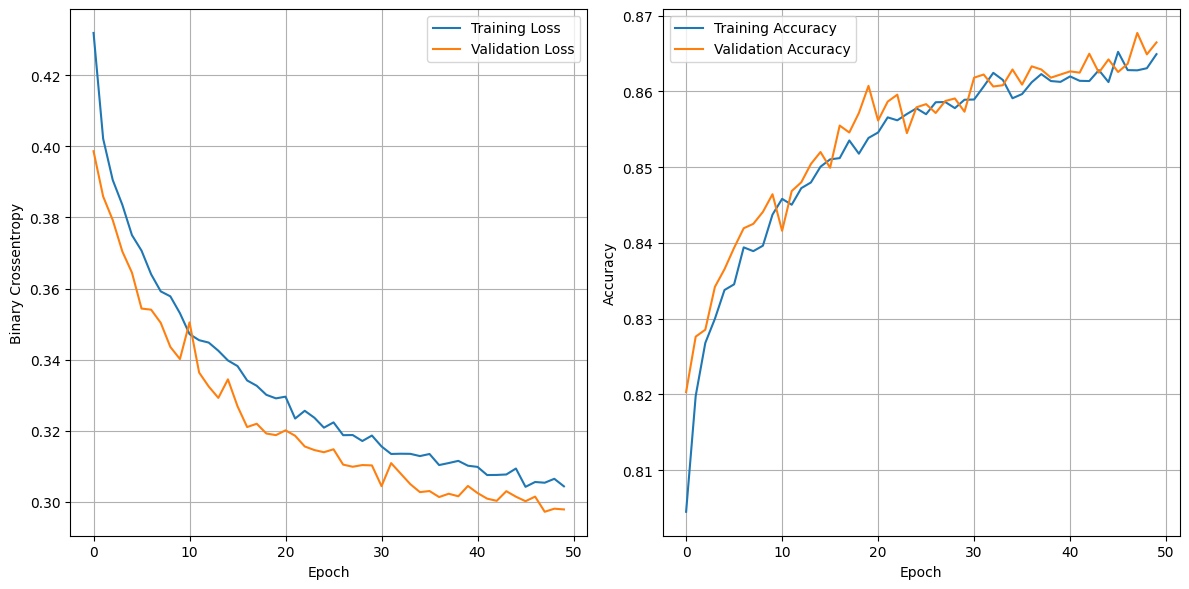

In [30]:
def plot_learning_curve(history):
    # Create subplots with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Plot training and validation loss
    ax1.plot(history.history['loss'], label='Training Loss')
    ax1.plot(history.history['val_loss'], label='Validation Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary Crossentropy')
    ax1.legend()
    ax1.grid(True)

    # Plot training and validation accuracy
    ax2.plot(history.history['accuracy'], label='Training Accuracy')
    ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True)

    # Adjust layout to prevent clipping of labels
    plt.tight_layout()

    # Show the plot    
    plt.show()
    
plot_learning_curve(history)

In [31]:
y_predANN = final_model.predict(X_test)
y_predANN = (y_pred > 0.5).astype(int)
y_predANN



376/376 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step


array([[1],
       [1],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [32]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(criterion="gini",max_depth=50,min_samples_split=10,random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=50, min_samples_split=10, random_state=42)

In [33]:
model.score(X_test,y_test)

0.9178936860494136

In [34]:
y_predrf=model.predict(X_test)
y_predrf

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

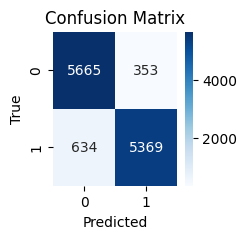

In [35]:
from sklearn.metrics import confusion_matrix

confusion_mat = confusion_matrix(y_test, y_predrf)

plt.figure(figsize=(2, 2))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix')

In [36]:
from sklearn.metrics import classification_report

print(f'classification report:')
print(classification_report(y_test, y_predrf))

classification report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      6018
           1       0.94      0.89      0.92      6003

    accuracy                           0.92     12021
   macro avg       0.92      0.92      0.92     12021
weighted avg       0.92      0.92      0.92     12021



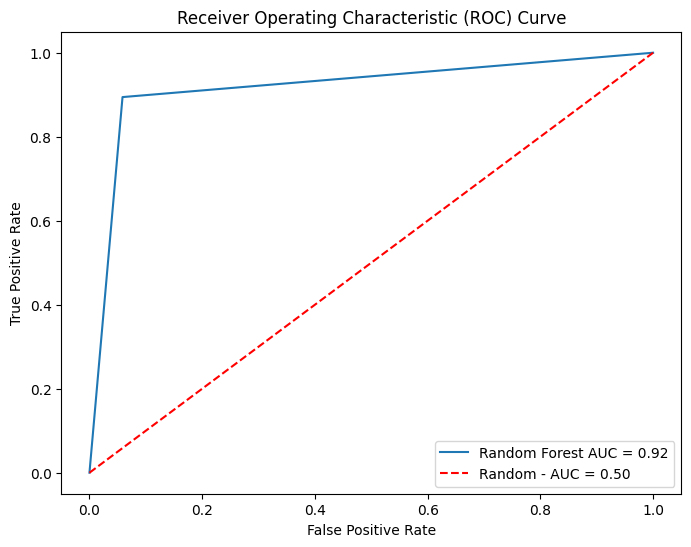

In [37]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_predrf)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest AUC = {auc(fpr, tpr):.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random - AUC = 0.50') 
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

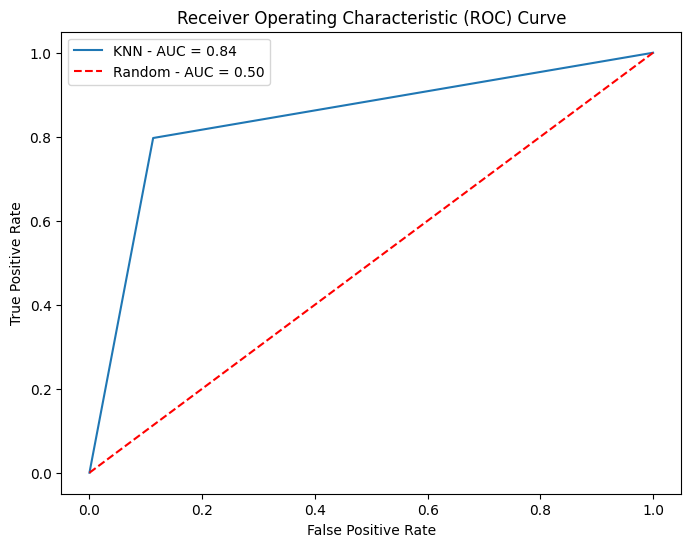

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
y_predKNN = classifier.predict(X_test)

from sklearn.metrics import roc_curve, auc

# Assuming you have calculated the ROC curve for KNN model as shown in your code

# Plotting ROC curve
plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(y_test, y_predKNN)
plt.plot(fpr, tpr, label=f'KNN - AUC = {auc(fpr, tpr):.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random - AUC = 0.50')  
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


Text(0.5, 1.0, 'Confusion Matrix')

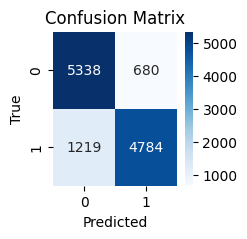

In [41]:
from sklearn.metrics import confusion_matrix

confusion_mat = confusion_matrix(y_test, y_predKNN)

plt.figure(figsize=(2, 2))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix')

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)





In [ ]:
scaled_data.shape

(32581, 9)

In [ ]:
x_pca.shape

(32581, 2)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size = 0.25, random_state = 42)
classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
cm

array([[6010,  321],
       [1337,  478]], dtype=int64)

In [ ]:
ac

0.7964645224650135

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.7929044930027007